In [16]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Load the dataset (corrected file path and method)
df = pd.read_csv("car data.csv")  # Fixed typo in 'read.csv' -> 'read_csv'

# Display the first few rows of the dataset
df.head()


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [17]:
# Feature Engineering: Calculate car age
df["Car_Age"] = 2025 - df["Year"]  # Assuming current year is 2025

# Drop unnecessary columns
df = df.drop(columns=["Year", "Car_Name"])

# Display updated dataframe
df.head()


,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Car_Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,11
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,12
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,8
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,14
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,11


In [18]:
# One-Hot Encoding for Categorical Variables
categorical_features = ["Fuel_Type", "Selling_type", "Transmission"]
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Display updated dataframe
df.head()


,Selling_Price,Present_Price,Driven_kms,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,11,False,True,False,True
1,4.75,9.54,43000,0,12,True,False,False,True
2,7.25,9.85,6900,0,8,False,True,False,True
3,2.85,4.15,5200,0,14,False,True,False,True
4,4.60,6.87,42450,0,11,True,False,False,True


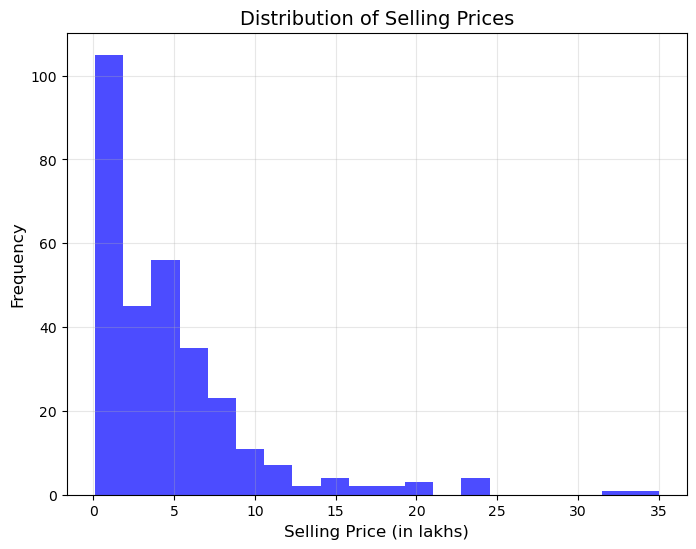

In [19]:
import matplotlib.pyplot as plt

# Plot histogram of Selling Price
plt.figure(figsize=(8, 6))
plt.hist(df['Selling_Price'], bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Selling Prices', fontsize=14)
plt.xlabel('Selling Price (in lakhs)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(alpha=0.3)
plt.show()


In [20]:
# Define features (X) and target (y)
X = df.drop(columns=["Selling_Price"])  # Features
y = df["Selling_Price"]  # Target

# Display features and target
print("Features (X):")
print(X.head())

print("\nTarget (y):")
print(y.head())


Features (X):
   Present_Price  Driven_kms  Owner  Car_Age  Fuel_Type_Diesel  \
0           5.59       27000      0       11             False   
1           9.54       43000      0       12              True   
2           9.85        6900      0        8             False   
3           4.15        5200      0       14             False   
4           6.87       42450      0       11              True   

   Fuel_Type_Petrol  Selling_type_Individual  Transmission_Manual  
0              True                    False                 True  
1             False                    False                 True  
2              True                    False                 True  
3              True                    False                 True  
4             False                    False                 True  

Target (y):
0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64


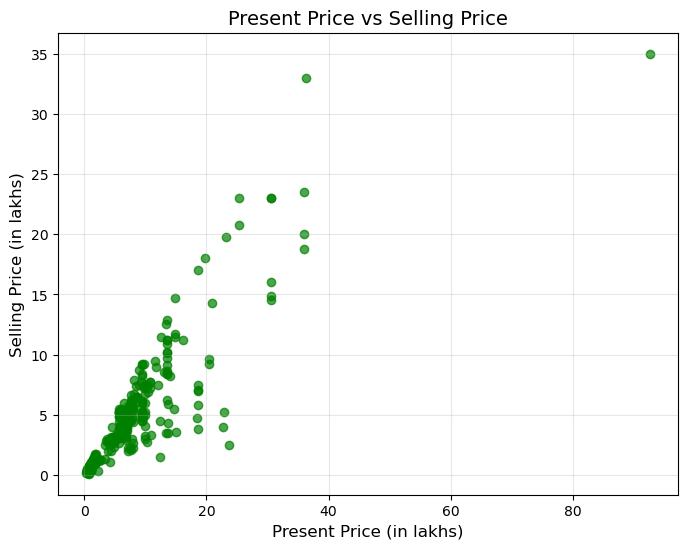

In [21]:
# Scatter plot of Present Price vs Selling Price
plt.figure(figsize=(8, 6))
plt.scatter(df['Present_Price'], df['Selling_Price'], alpha=0.7, color='green')
plt.title('Present Price vs Selling Price', fontsize=14)
plt.xlabel('Present Price (in lakhs)', fontsize=12)
plt.ylabel('Selling Price (in lakhs)', fontsize=12)
plt.grid(alpha=0.3)
plt.show()


In [22]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (240, 8)
X_test shape: (61, 8)
y_train shape: (240,)
y_test shape: (61,)


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Train Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Train Random Forest Model
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

print("Models trained successfully!")


Models trained successfully!


In [24]:
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression Predictions
lr_preds = lr_model.predict(X_test)

# Random Forest Predictions
rf_preds = rf_model.predict(X_test)

# Evaluation Function
def evaluate_model(name, y_test, preds):
    mse = mean_squared_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    print(f"{name} Model Evaluation:")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R-squared: {r2:.2f}")
    print("-" * 30)

# Evaluate both models
evaluate_model("Linear Regression", y_test, lr_preds)
evaluate_model("Random Forest", y_test, rf_preds)


Linear Regression Model Evaluation:
Mean Squared Error: 3.48
R-squared: 0.85
------------------------------
Random Forest Model Evaluation:
Mean Squared Error: 0.93
R-squared: 0.96
------------------------------


In [25]:
# Predicting with new data
new_data = {
    "Present_Price": [6.0],
    "Driven_kms": [15000],
    "Owner": [0],
    "Car_Age": [7],
    "Fuel_Type_Diesel": [0],
    "Fuel_Type_Petrol": [1],
    "Selling_type_Individual": [0],
    "Transmission_Manual": [1]
}
new_df = pd.DataFrame(new_data)

# Random Forest Prediction
prediction = rf_model.predict(new_df)
print(f"Predicted Selling Price: {prediction[0]:.2f}")


Predicted Selling Price: 5.35
